In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
# Линейный конгруэнтный метод 
class CustomGenerator:
    seed = 42
    alpha = 1664525
    c = 1013904223
    m = 2 ** 32
    x_current = seed
     
    @staticmethod
    def random():
        CustomGenerator.x_current = (CustomGenerator.alpha * CustomGenerator.x_current + CustomGenerator.c) % CustomGenerator.m
        return CustomGenerator.x_current / CustomGenerator.m

In [3]:
generator = CustomGenerator()
num_samples = 10**6

# 1 Задание

In [4]:
def task1(p):
    return generator.random() < p


In [5]:
custom_p = -1
while not 0 <= custom_p <= 1:
    custom_p = float(input("Введите вероятность от 0 до 1\n"))

In [6]:
count_true = sum(1 for _ in range(num_samples) if task1(custom_p))
count_false = num_samples - count_true
emperical_p = count_true / num_samples
print(emperical_p)

0.300202


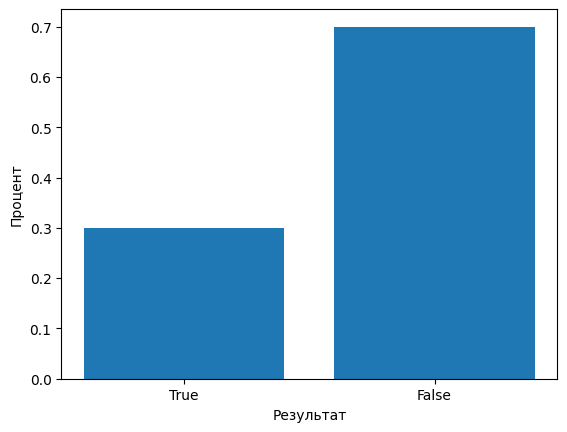

In [7]:
labels = ['True', 'False']
values = [count_true / num_samples, count_false / num_samples]

plt.bar(labels, values)
plt.xlabel('Результат')
plt.ylabel('Процент')
plt.show()

# 2 Задание

In [8]:
k = -1
while not (1 <= k): 
    k = int(input("input k:\n"))

In [9]:
probabilities = []

for _ in range(k):   
    probabilities.append(float(input("Введите вероятность от 0 до 1\n")))

ValueError: could not convert string to float: 'щ.3'

In [28]:
def task2(probabilities):
    result = []
    for i in range(len(probabilities)):
        result.append(generator.random() < probabilities[i])
    return result

In [29]:
count = [{True: 0, False: 0} for _ in range(len(probabilities))]

for i in range(num_samples):
    res = task2(probabilities)
    for j in range(len(res)):
        count[j][res[j]] += 1

In [30]:
emperical_p = []
for i in count:
    emperical_p.append(i[True] / (i[True] + i[False]))
print(*emperical_p)

0.400799 0.500821 0.599802 0.899855


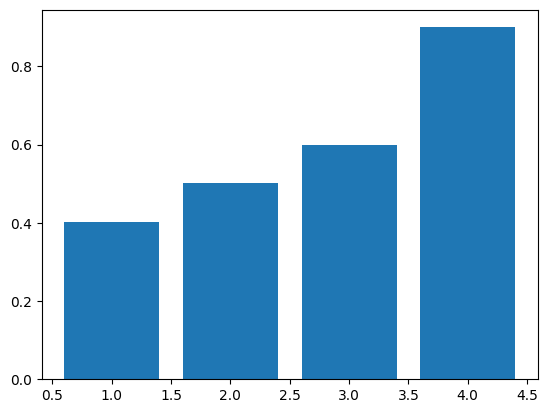

In [31]:
plt.bar([i for i in range(1, len(probabilities) + 1)], [count[i][True] / (count[i][True] + count[i][False]) for i in range(len(count))])

plt.show()

# 3 Задание

In [32]:
p_a = -1
while not 0 <= p_a <= 1:
    p_a = float(input("Введите вероятность P(A) от 0 до 1\n"))

In [33]:
p_b_a = -1
while not 0 <= p_b_a <= 1:
    p_b_a = float(input("Введите вероятность P(B/A) от 0 до 1\n"))

In [34]:
def task3(p_a, p_b_a):
    p_ab = p_a * p_b_a
    p_a_notb = p_a * (1 - p_b_a)
    p_nota_b = (1 - p_a) * (1 - p_b_a)
    p_nota_notb = p_b_a * (1 - p_a)

    r = generator.random()
    if r <= p_ab:
        return 0
    elif r <= p_a_notb + p_ab:
        return 1
    elif r <= p_a_notb + p_ab + p_nota_b:
        return 2
    elif r <= p_a_notb + p_ab + p_nota_b + p_nota_notb:
        return 3

In [35]:
count = {i: 0 for i in range(4)}

for i in range(num_samples):
    count[task3(p_a, p_b_a)] += 1

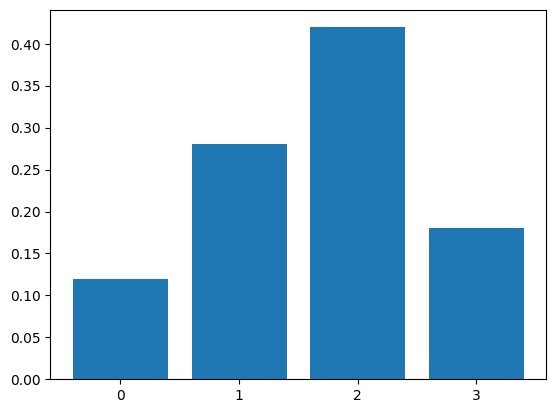

In [36]:
plt.bar([str(i) for i in range(4)], 
        [count[i] / num_samples for i in range(4)])
plt.show()

In [37]:
emperical_p = [count[i] / num_samples for i in range(4)]
print(*emperical_p)

0.120013 0.280299 0.419603 0.180085


# 4 Задание

In [38]:
k = -1
while not (1 <= k): 
    k = int(input("input k:\n"))

In [42]:
probabilities = []

while sum(probabilities) != 1:
    for _ in range(k):
        probabilities.append(float(input()))

In [43]:
def task4(probabilities):
    s = probabilities[0]
    step = 0
    r = generator.random()
    while True:
        if r <= s:
            return step
        else:
            step += 1
            s += probabilities[step]

In [44]:


count = {i: 0 for i in range(len(probabilities))}

for i in range(num_samples):
    count[task4(probabilities)] += 1



In [45]:
emperical_p = []
for i in count:
    emperical_p.append(count[i] / num_samples)
print(*emperical_p)

0.399999 0.600001


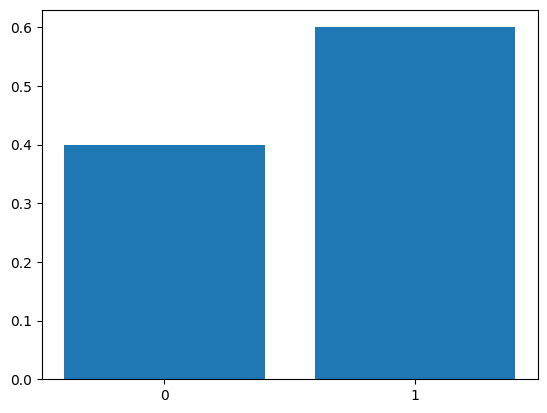

In [46]:
plt.bar([str(i) for i in range(len(count))], 
        [count[i] / num_samples for i in range(len(count))])
plt.show()

# Дополнительное задание

In [47]:
k = int(input("input k\n"))

In [48]:
rate = []

for i in range(2 ** k):
    rate.append(int(input(f"input rate of team number {i + 1} \n")))

In [49]:
playing_teams = [i + 1 for i in range(2 ** k)]

for i in range(k):
    temp_live_temp = []
    random.shuffle(playing_teams)
    print(f'\nround number {i + 1}')
    
    for j in range(2 ** (k - i - 1)):
        first, second = j, 2 ** (k - i) - j - 1
        print(f'team {playing_teams[first]} vs team {playing_teams[second]}')
        common_rate = rate[playing_teams[first] - 1] + rate[playing_teams[second] - 1]
        res = task4([rate[playing_teams[first] - 1] / common_rate, rate[playing_teams[second] - 1] / common_rate])
        number_win = {0: playing_teams[j], 1: playing_teams[2 ** (k - i) - j - 1]}
        print(f'team number won - {number_win[res]}')
        temp_live_temp.append(number_win[res])
    
    move = ', '.join(map(str, sorted(temp_live_temp)))   
    lose = ', '.join(map(str, sorted(set(playing_teams) - set(temp_live_temp))))
    print(f'move to the next round teams: {move}')
    print(f'lose teams: {lose}')
    playing_teams = temp_live_temp

print(f'\n\nwi1nner - team {playing_teams[0]}')


round number 1
team 2 vs team 4
team number won - 4
team 1 vs team 3
team number won - 1
move to the next round teams: 1, 4
lose teams: 2, 3

round number 2
team 1 vs team 4
team number won - 1
move to the next round teams: 1
lose teams: 4


winner - team 1
